# Simple Linear Regression with Cost Function Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Load the Dataset

In [5]:
# DataSet From Kaggle: https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression
df = pd.read_csv(r"C:\Users\Maevex\Desktop\Ml DeepLearning\Linear Regression\Salary_dataset.csv")  # Adjust the path as necessary

# Assuming the CSV has columns 'X' and 'y'
X = df[df.columns[1]].values.reshape(-1, 1)  # Reshape to 2D array for scikit-learn
y = df[df.columns[2]]  # Dependent variable

## Split the Data into Training and Testing Sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the Linear Regression Model

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Make Predictions and Evaluate the Model

In [8]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 49830096.855908334
Root Mean Squared Error: 7059.043621901506
Mean Absolute Error: 6286.453830757745
R-squared: 0.9024461774180498


## Model Properties and Evaultion

In [9]:
print(f"Model Coefficient: {model.coef_[0]}")
print(f"Model Intercept: {model.intercept_}")
print(f"Model Equation: Salary = {model.coef_[0]} * YOE + {model.intercept_}")
print(f"Number of Points: {len(df)}")

Model Coefficient: 9423.81532303098
Model Intercept: 24380.20147947369
Model Equation: Salary = 9423.81532303098 * YOE + 24380.20147947369
Number of Points: 30


## Custom Cost Function Implementation

In [10]:
def compute_cost(y_true, y_pred):
    m = len(y_true)
    cost = (1 / (2 * m)) * np.sum((y_pred - y_true) ** 2)
    return cost

custom_mse_cost = compute_cost(y_test.values, y_pred)
print(f"Custom Computed Cost (MSE): {custom_mse_cost}")

Custom Computed Cost (MSE): 24915048.427954167


## Plotting the Cost Function with Varying Slope (θ₁) On All Data

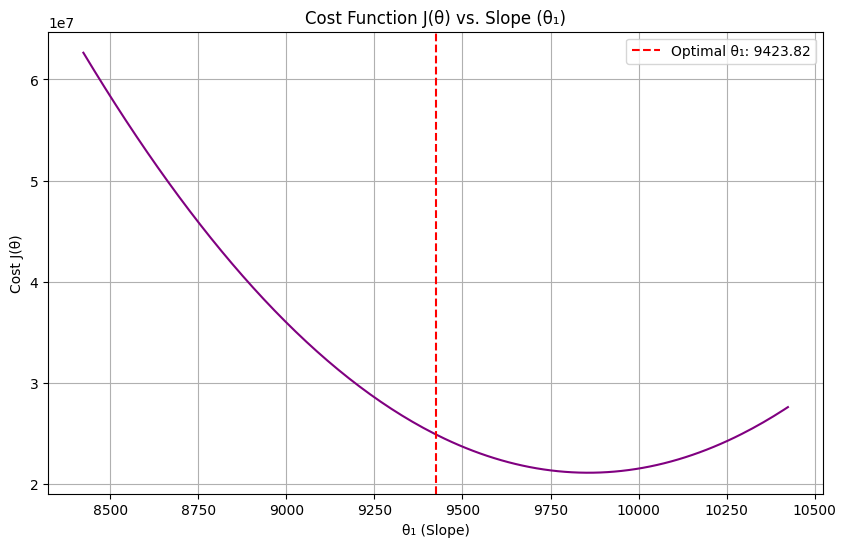

In [14]:
theta_0 = model.intercept_
theta_1_range = np.linspace(model.coef_[0] - 1000, model.coef_[0] + 1000, 200)
costs = []

for theta_1 in theta_1_range:
    y_pred_custom = theta_0 + theta_1 * X_test.flatten()
    cost = compute_cost(y_test.values, y_pred_custom)
    costs.append(cost)

plt.figure(figsize=(10, 6))
plt.plot(theta_1_range, costs, color='purple')
plt.title('Cost Function J(θ) vs. Slope (θ₁)')
plt.xlabel('θ₁ (Slope)')
plt.ylabel('Cost J(θ)')
plt.grid(True)
plt.axvline(model.coef_[0], color='red', linestyle='--', label=f"Optimal θ₁: {model.coef_[0]:.2f}")
plt.legend()
plt.show()

## Plotting the Cost Function with Varying Slope (θ₁) On Train Data

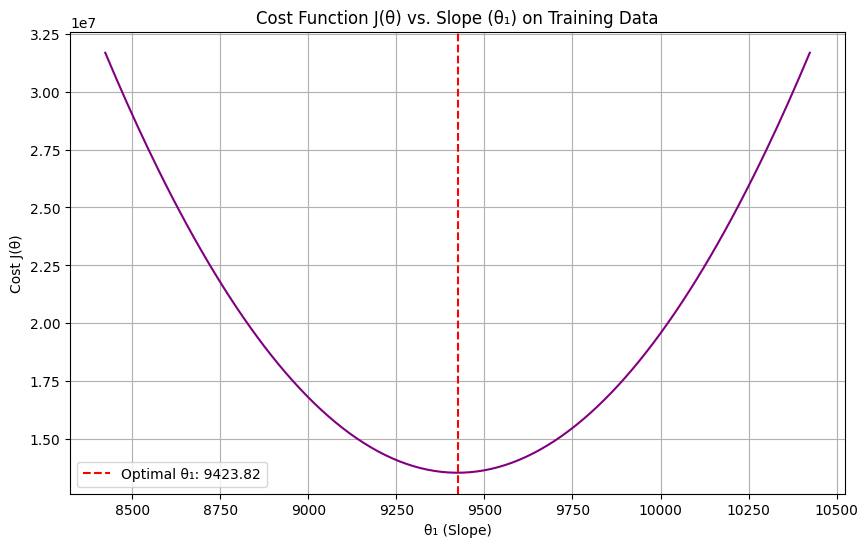

In [15]:
# --- Plotting the Cost Function (J(theta)) with varying slope (theta1) on training data ---
theta_0 = model.intercept_
theta_1_range = np.linspace(model.coef_[0] - 1000, model.coef_[0] + 1000, 200)
costs = []

# Compute cost for each theta_1 value using training data
for theta_1 in theta_1_range:
    y_pred_custom = theta_0 + theta_1 * X_train.flatten()
    cost = compute_cost(y_train.values, y_pred_custom)
    costs.append(cost)

# Plotting the cost function curve
plt.figure(figsize=(10, 6))
plt.plot(theta_1_range, costs, color='purple')
plt.title('Cost Function J(θ) vs. Slope (θ₁) on Training Data')
plt.xlabel('θ₁ (Slope)')
plt.ylabel('Cost J(θ)')
plt.grid(True)
plt.axvline(model.coef_[0], color='red', linestyle='--', label=f"Optimal θ₁: {model.coef_[0]:.2f}")
plt.legend()
plt.show()


## Contour Plot of Cost Function J(θ₀, θ₁)  (3D)
 To Show Best (θ₀ & θ₁)

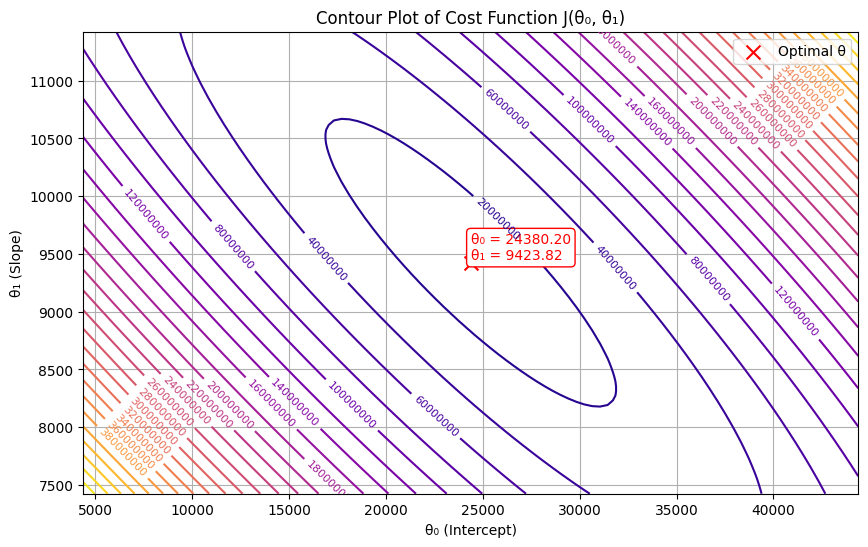

In [12]:
theta_0_vals = np.linspace(model.intercept_ - 20000, model.intercept_ + 20000, 100)
theta_1_vals = np.linspace(model.coef_[0] - 2000, model.coef_[0] + 2000, 100)

J_vals = np.zeros((len(theta_0_vals), len(theta_1_vals)))

for i in range(len(theta_0_vals)):
    for j in range(len(theta_1_vals)):
        theta_0 = theta_0_vals[i]
        theta_1 = theta_1_vals[j]
        y_pred = theta_0 + theta_1 * X_train.flatten()
        J_vals[i, j] = compute_cost(y_train.values, y_pred)

T0, T1 = np.meshgrid(theta_0_vals, theta_1_vals)

plt.figure(figsize=(10, 6))
cp = plt.contour(T0, T1, J_vals.T, levels=30, cmap='plasma')
plt.clabel(cp, inline=True, fontsize=8)
plt.scatter(model.intercept_, model.coef_[0], color='red', marker='x', s=100, label='Optimal θ')

plt.text(model.intercept_, model.coef_[0],
         f'θ₀ = {model.intercept_:.2f}\nθ₁ = {model.coef_[0]:.2f}',
         fontsize=10, color='red', ha='left', va='bottom', bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))

plt.title('Contour Plot of Cost Function J(θ₀, θ₁)')
plt.xlabel('θ₀ (Intercept)')
plt.ylabel('θ₁ (Slope)')
plt.legend()
plt.grid(True)
plt.show()

Conclusion

By examining the equation produced by the model, we observe that Linear Regression automatically determines the optimal values for (θ₀, θ₁) without requiring manual computation.